# **Load Data**

**We will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!**

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data"
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 796MB/s]

The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.
There are no `Null` values, so we don't have to work on ways to replace values.
Most of the transactions were **Non-Fraud (99.83%)** of the time, while **Fraud transactions occurs (017%)**of the time in the dataframe.

**Necessay Library**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA , TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score , recall_score , f1_score , roc_auc_score , accuracy_score  , classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("/content/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Let's check is there any null value**

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
print("No Frauds" , df["Class"].value_counts()[0] / df.shape[0] *100 , "% of the datasets")
print("Frauds" , df["Class"].value_counts()[1] / df.shape[0] *100 , "% of the dataset")

No Frauds 99.82725143693798 % of the datasets
Frauds 0.1727485630620034 % of the dataset


**How imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!**

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

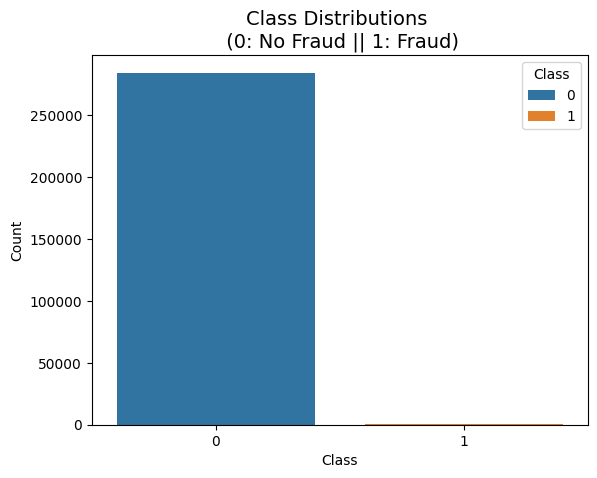

In [10]:
class_df = df["Class"].value_counts().sort_values(ascending = False).reset_index().rename(columns = {"count" : "Count"})
sns.barplot(data = class_df , x = "Class" , y = "Count" , hue = "Class")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features.**

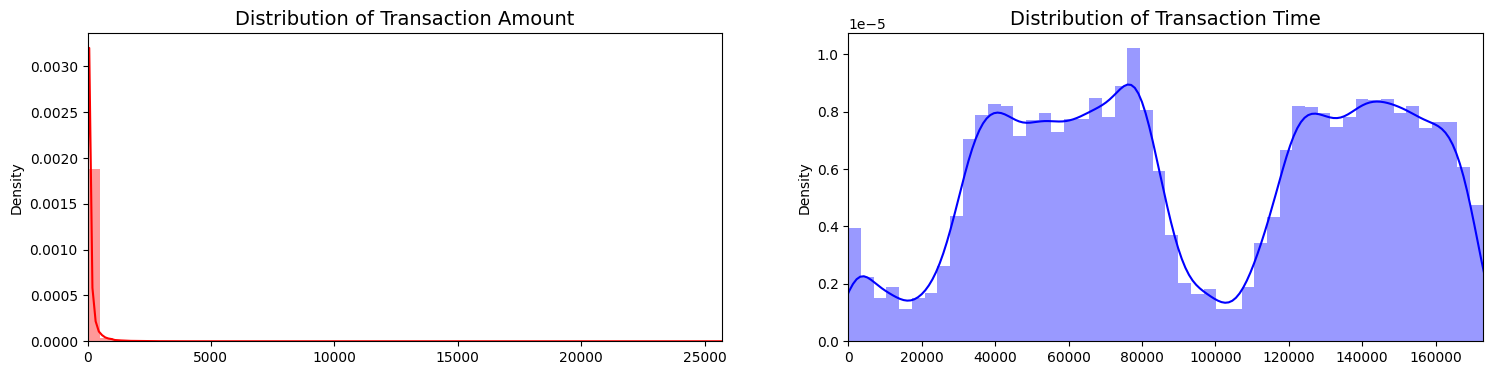

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

**Scaling and Distributing**

 We will first scale the columns  of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a **sub sample** of the dataframe in order to have an **equal** amount of **Fraud** and **Non-Fraud** cases, helping our Machine Learning algorithms better understand patterns that determines whether a transaction is a fraud or not.

**What is a sub-Sample?**

In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

**Why do we create a sub-sample?**

AS we know we saw that the orginal dataframe was heavily imbalanced transactions of Non-Fraud is more than transactions of Fraud

- Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

- Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

**Summary:**

- Scaled amount and scaled time are the columns with scaled values.
- There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
- We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [12]:
from sklearn.preprocessing import StandardScaler , RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df["scaled_amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1 , 1))
df["scaled_time"] = rob_scaler.fit_transform(df["Time"].values.reshape(-1 , 1))

df.drop(["Time" , "Amount"] , axis = 1 , inplace = True)

In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


 **Splitting the Data (Original DataFrame)**

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
print('No Frauds', round(df['Class'].value_counts()[0]/df.shape[0] * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/df.shape[0] * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


**Random Under-Sampling**

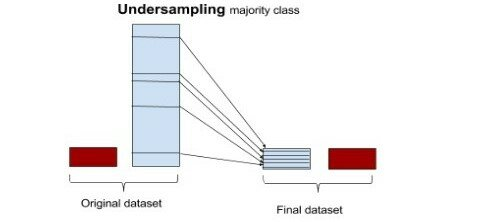

- The first thing we have to do is determine how imbalanced is our class (use `value_counts()` on the class column to determine the amount for each label)
- Once we determine how many  are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a `50/50` ratio), this will be equivalent to `492 cases of fraud` and `492 cases of non-fraud` transactions.
- After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime

In [15]:
''' we know that our data is highly skewed we should make our data eqivalent(50/50 ratio data) to
    have a normal distrubution of th classes
'''

df = df.sample(frac = 1)

fraud_df = df.loc[df["Class"] ==1]
non_fraud_df = df.loc[df["Class"] ==0][:492]

normal_distributed_df = pd.concat([fraud_df , non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
111193,-0.223713,-0.147523,1.247440,0.269971,0.281041,0.706478,-0.463574,-1.095209,0.025790,-0.149209,...,-0.135061,-0.296326,-0.912455,0.137446,0.318724,0.181331,0.097242,-0.030281,0.029450,0
83297,4.152868,-0.292708,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,...,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,1
244571,0.083840,0.795533,2.032758,0.072226,-2.277678,0.240780,0.855245,-0.443245,0.264629,-0.117322,...,-0.104562,-0.217389,-0.609881,0.126016,-0.003735,-0.028602,0.350184,-0.086557,-0.045681,0
6774,-0.293440,-0.894794,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1
46909,-0.293440,-0.489985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,...,0.058861,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1


In [16]:
new_df["Class"].value_counts().reset_index()

,Class,count
0,0,492
1,1,492


**Now we created sub-sample which is equally distributed and contain equal number of data from each classes**

**Let's see the distributation of sub-sample data**

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


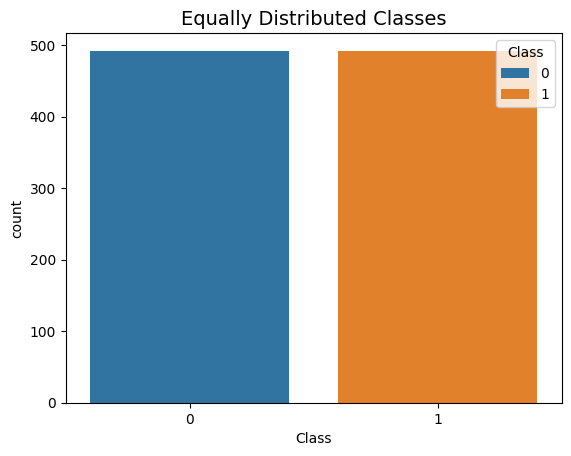

In [17]:
print('Distribution of the Classes in the subsample dataset')
print(new_df["Class"].value_counts()/new_df.shape[0])

equal_data = new_df["Class"].value_counts().reset_index()

sns.barplot(data = equal_data , x = "Class" , y= "count" , hue = "Class")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Correlation Matrices**

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

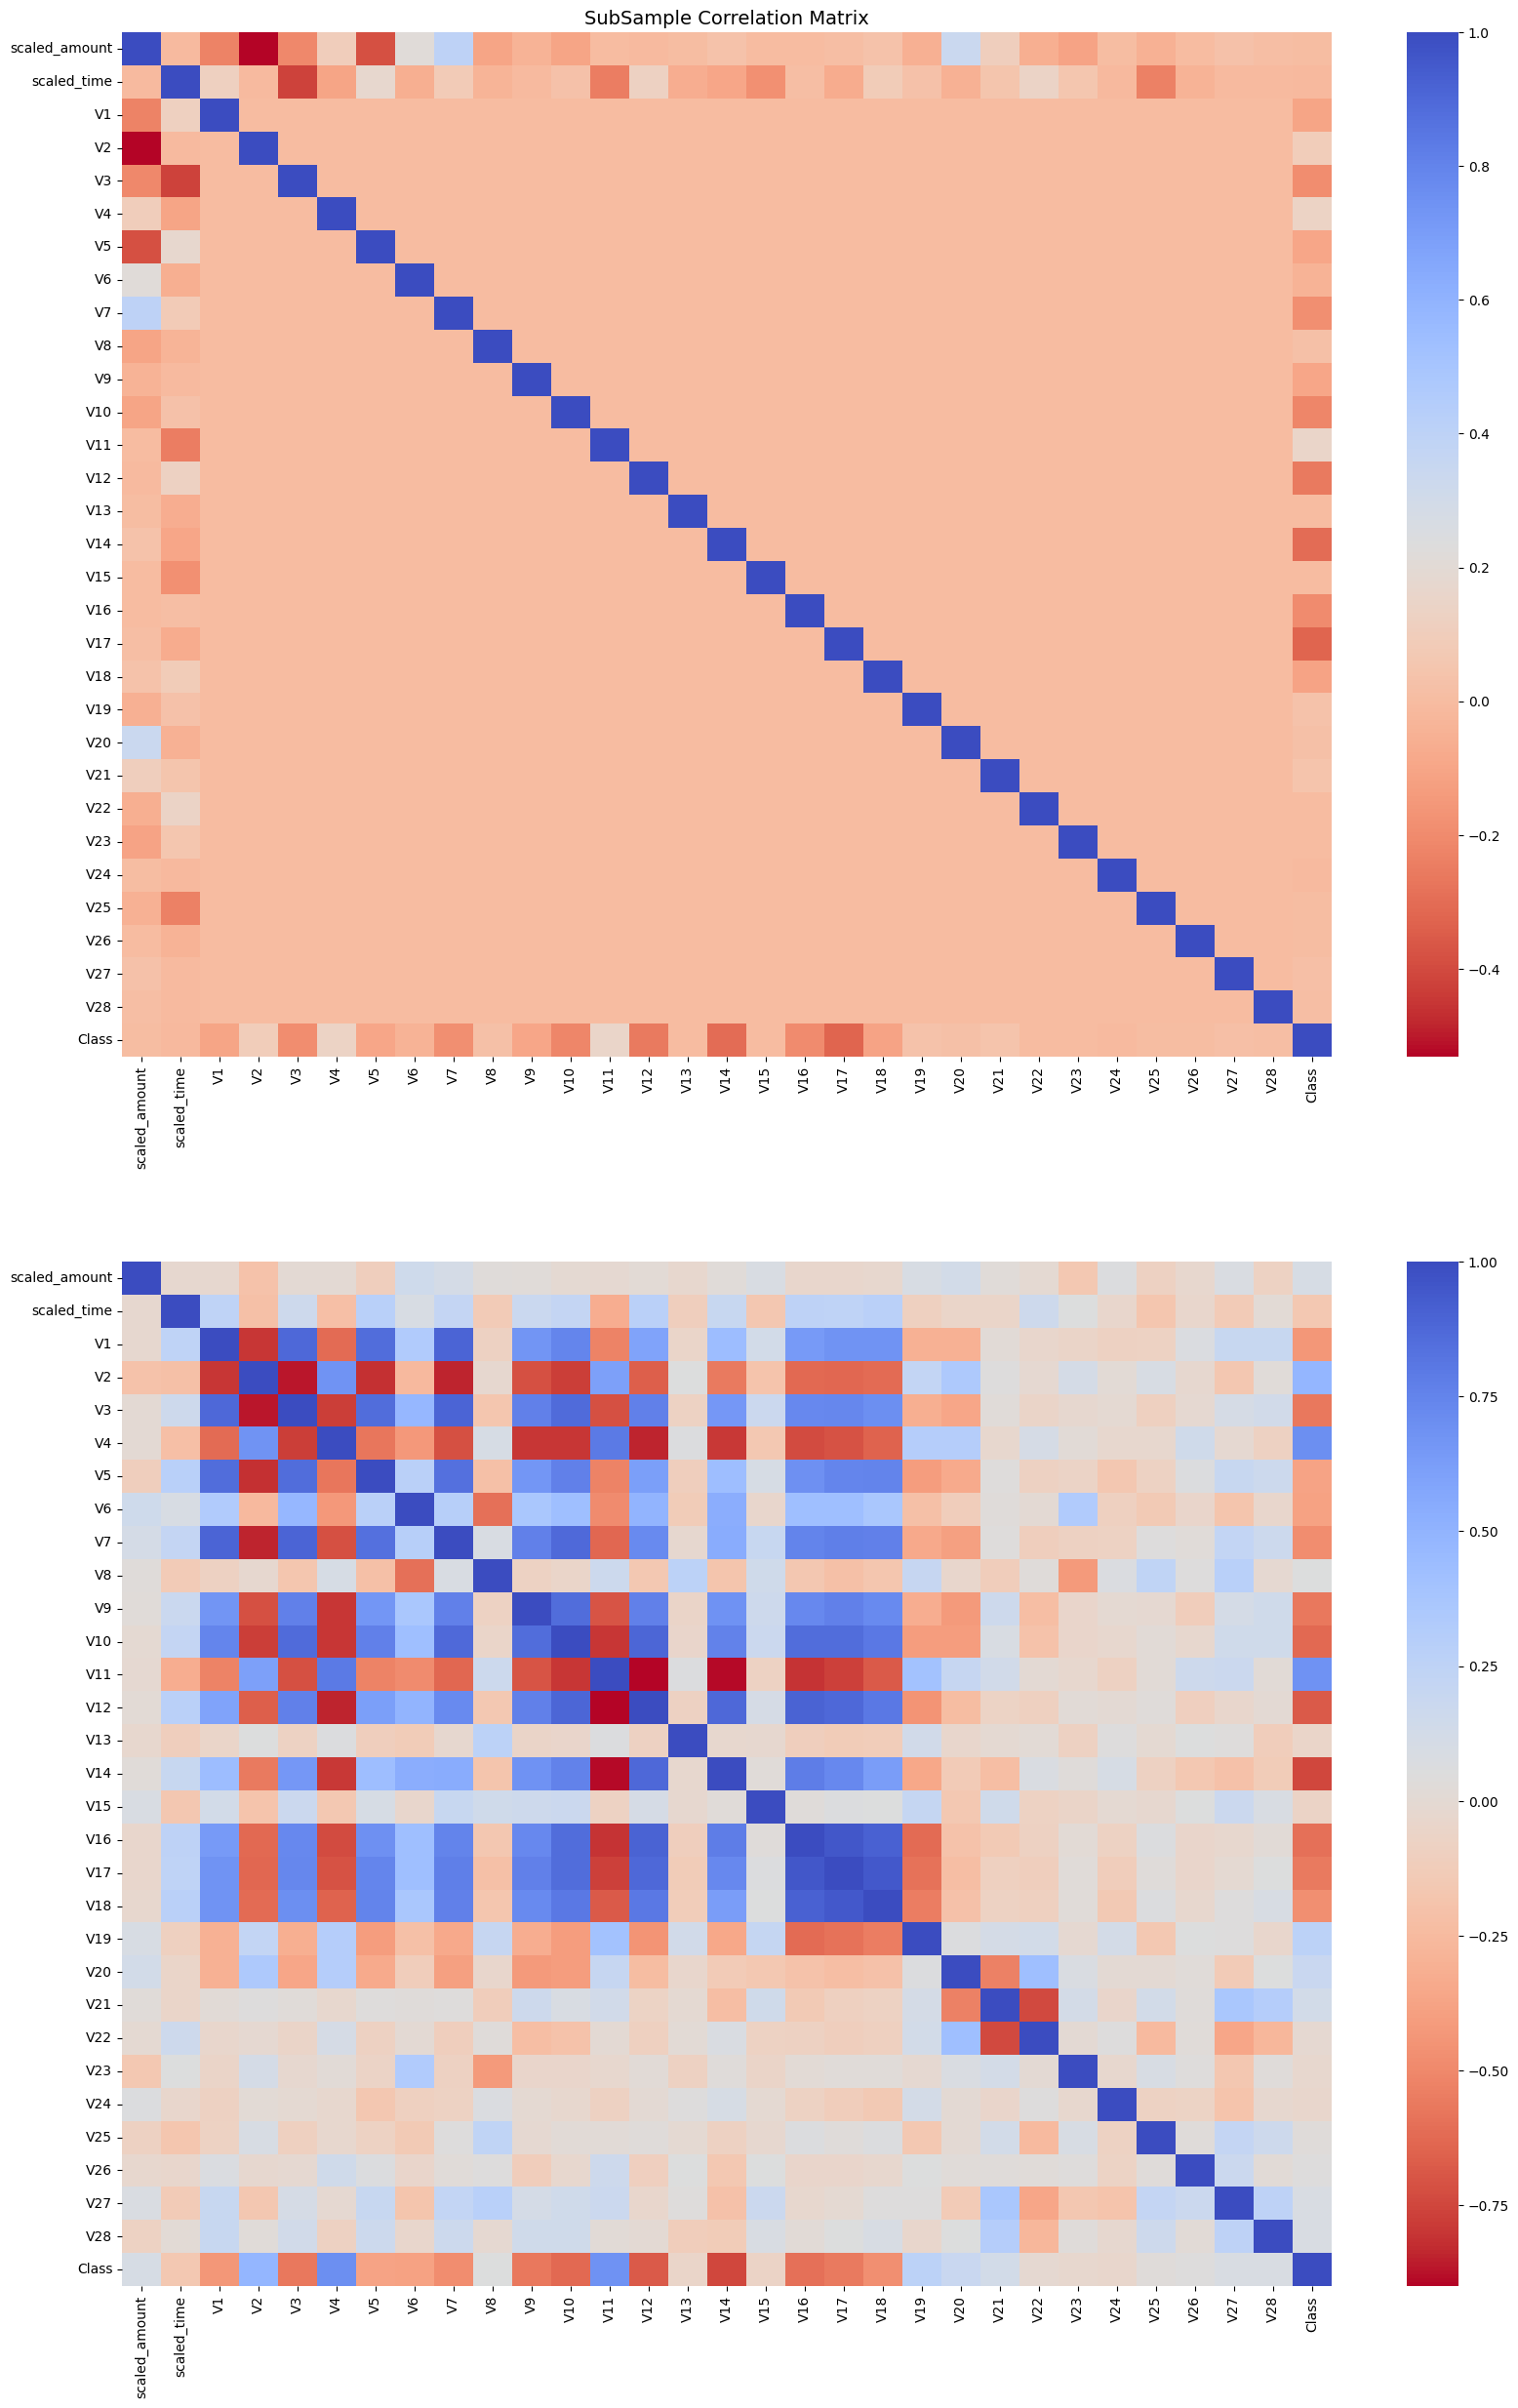

In [52]:
f , (ax1 , ax2)  = plt.subplots(2,1 , figsize = (20,30))

corr = df.corr()

sns.heatmap(corr , cmap = "coolwarm_r" , annot_kws = {"size":20} , ax = ax1)
ax1.set_title("Imabalanced Correlation Matrix" , fontsize = 14)

sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr , cmap = "coolwarm_r" , annot_kws = {"size":20} , ax = ax2)
ax1.set_title("SubSample Correlation Matrix" , fontsize = 14)
plt.show()

**Summary and Explanation:**

- Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
- Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
- BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

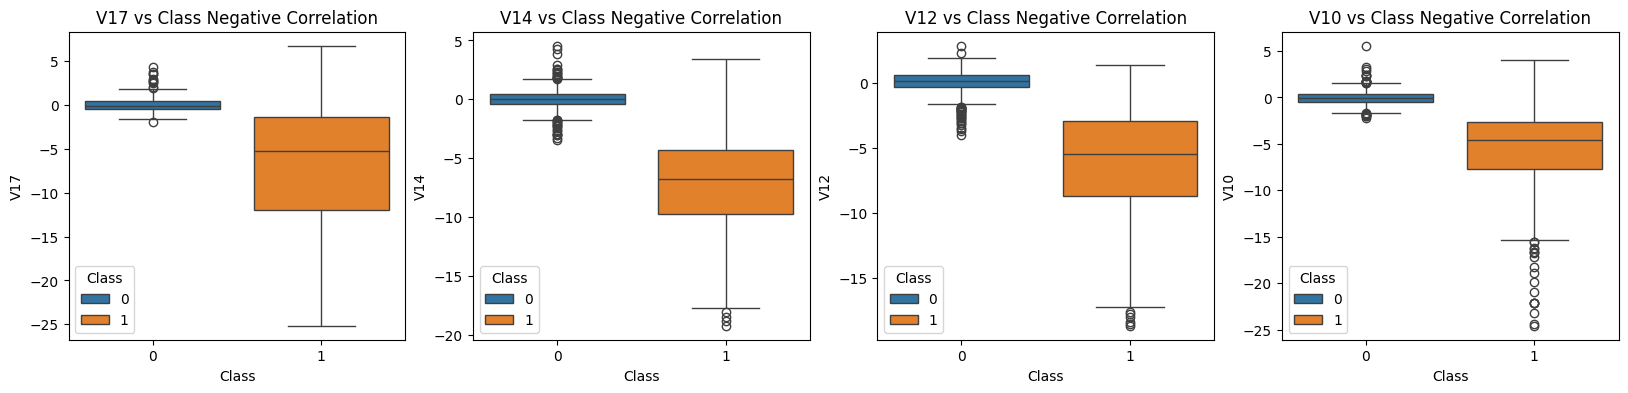

In [19]:
fig , axes = plt.subplots(ncols = 4 , figsize = (20 , 4))

# Negative Correlation boxplot
sns.boxplot(x = "Class" , y = "V17" , data = new_df , ax = axes[0] , hue = "Class")
axes[0].set_title("V17 vs Class Negative Correlation")

sns.boxplot(x = "Class" , y = "V14" , data = new_df , ax = axes[1] , hue = "Class")
axes[1].set_title("V14 vs Class Negative Correlation")

sns.boxplot(x = "Class" , y = "V12" , data = new_df , ax = axes[2] , hue = "Class")
axes[2].set_title("V12 vs Class Negative Correlation")

sns.boxplot(x = "Class" , y = "V10" , data = new_df , ax = axes[3] , hue = "Class")
axes[3].set_title("V10 vs Class Negative Correlation")


Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

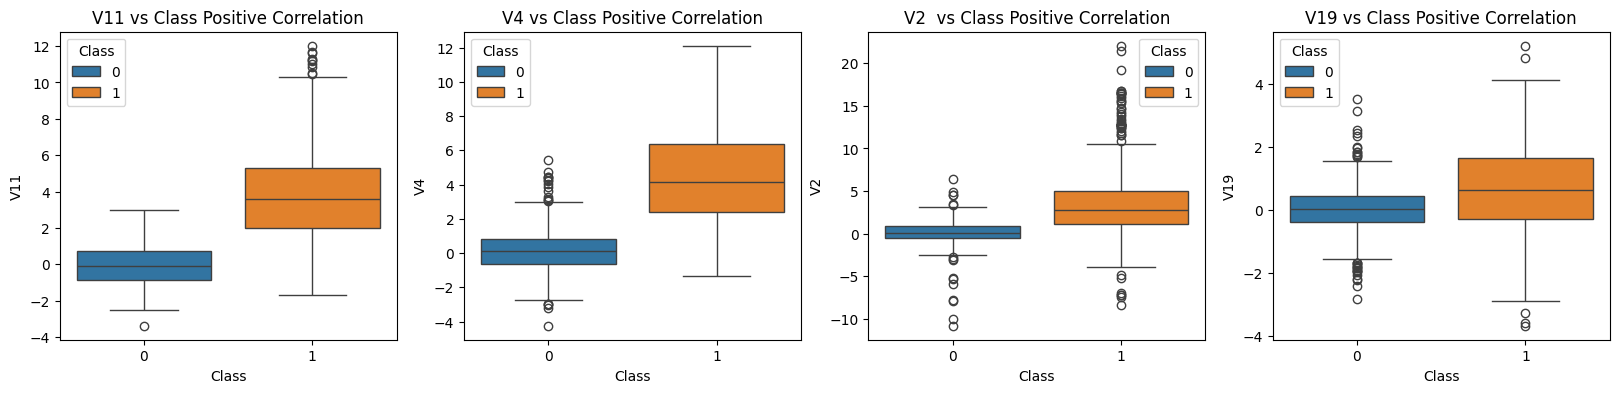

In [20]:
fig , axes = plt.subplots(ncols = 4 , figsize = (20 , 4))

# Positive Correlation boxplot
sns.boxplot(x = "Class" , y = "V11" , data = new_df , ax = axes[0] , hue = "Class")
axes[0].set_title("V11 vs Class Positive Correlation")

sns.boxplot(x = "Class" , y = "V4" , data = new_df , ax = axes[1] , hue = "Class")
axes[1].set_title("V4 vs Class Positive Correlation")

sns.boxplot(x = "Class" , y = "V2" , data = new_df , ax = axes[2] , hue = "Class")
axes[2].set_title("V2  vs Class Positive Correlation")

sns.boxplot(x = "Class" , y = "V19" , data = new_df , ax = axes[3] , hue = "Class")
axes[3].set_title("V19 vs Class Positive Correlation")


Text(0.5, 1.0, 'V10 Dustrubution Fraud Transactions')

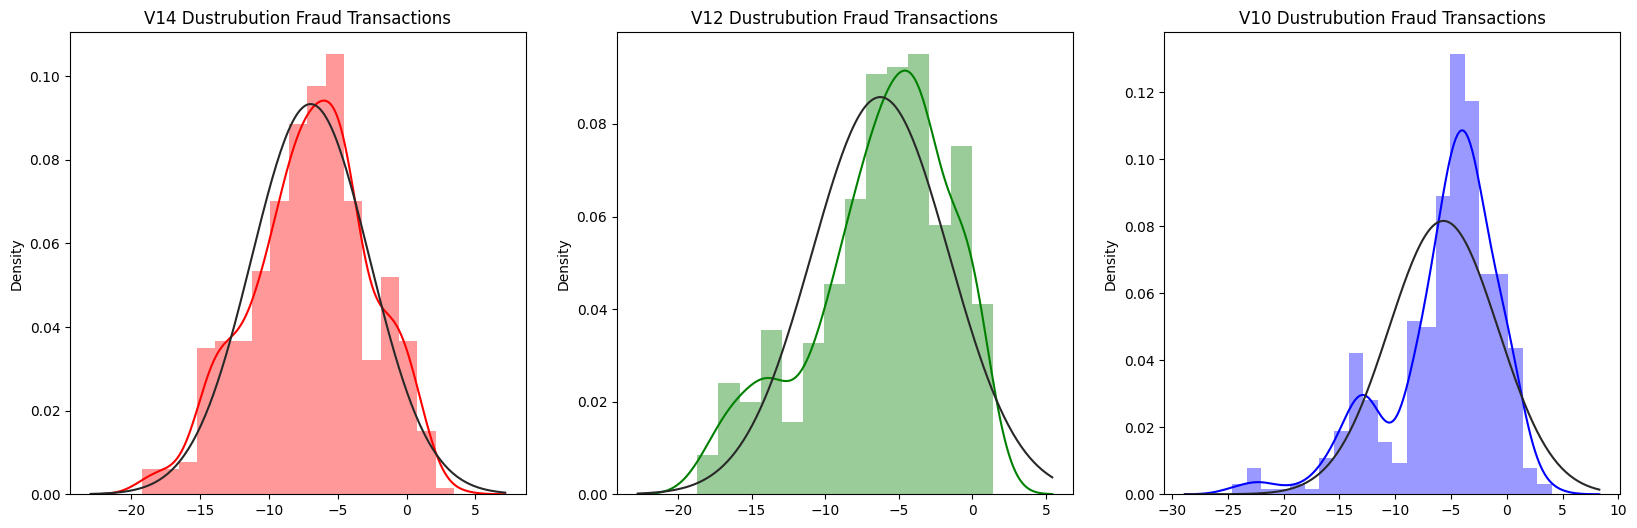

In [21]:
from scipy.stats import norm
f , (ax1 , ax2 , ax3) = plt.subplots(1,3 , figsize = (20 , 6))
v14_fraud_dist = new_df["V14"].loc[new_df["Class"] == 1].values
sns.distplot(v14_fraud_dist , ax = ax1 , fit = norm , color = "red")
ax1.set_title("V14 Dustrubution Fraud Transactions")

v12_fraud_dist = new_df["V12"].loc[new_df["Class"] == 1].values
sns.distplot(v12_fraud_dist , ax = ax2 , fit = norm , color = "green")
ax2.set_title("V12 Dustrubution Fraud Transactions")

v10_fraud_dist = new_df["V10"].loc[new_df["Class"] == 1].values
sns.distplot(v10_fraud_dist , ax = ax3 , fit = norm , color = "blue")
ax3.set_title("V10 Dustrubution Fraud Transactions")

**Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.**

# **Split the Data**

**In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.**

- Logistic Regression classifier is more accurate than the other three classifiers in most cases.
- GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
- Logistic Regression has the best **Receiving Operating Characteristic** score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

- The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (Low bias high variance).
- If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias low variance)

In [22]:
# Splitted the input columns and target columns
x = new_df.drop("Class" , axis = 1)
y = new_df["Class"]

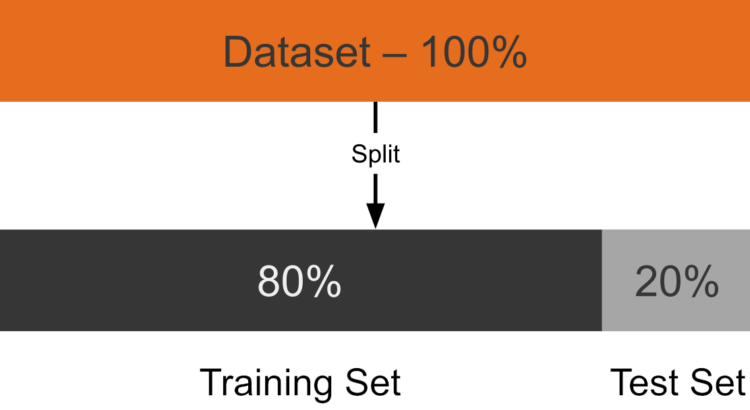

- We are splitting our whole data into 80% and 20%
- Where 80% would be your train data and rest 20% would ne your test data

In [23]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 42)

In [24]:
print(f"X_train shape - {x_train.shape}")
print(f"X_test shape - {x_test.shape}")
print(f"y_train shape - {y_train.shape}")
print(f"y_test shape - {y_test.shape}")

X_train shape - (787, 30)
X_test shape - (197, 30)
y_train shape - (787,)
y_test shape - (197,)


In [25]:
# Turn the values into an array for feeding the classification algorithms.
X_train = x_train.values
X_test = x_test.values
y_train = y_train.values
y_test = y_test.values

# **Model**

In [26]:
# Let's Implement Simple Classifier Model

classifiers = {
    "LogisticRegression": LogisticRegression() ,
    "Knearest" : KNeighborsClassifier() ,
    "SVM" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

In [27]:
# Applying Cross validation to check which model woking better
from sklearn.model_selection import cross_val_score

for key , classifier in classifiers.items():
  classifier.fit(x_train , y_train) ,
  training_score = cross_val_score(classifier , x_train , y_train , cv = 5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


Logistics, SVM , KNeighborsClassifier all of three with 93% accuracy which is quiet good accuracy even after not passed any parameter to the model

**Now we'll use the `GridSerchCV` to find out Best Hyperparamter for each Model**

In [28]:
from sklearn.model_selection import GridSearchCV

# .Logistic Regression Hyperparameter
log_reg_params = {
    # Regularization
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_log_reg = GridSearchCV(LogisticRegression() , log_reg_params)
grid_log_reg.fit(x_train , y_train)
log_reg = grid_log_reg.best_estimator_


# KNeighborsClassifier Hyperparameter
knears_params = {"n_neighbors": list(range(2,5,1))}

grid_knears = GridSearchCV(KNeighborsClassifier() , knears_params)
grid_knears.fit(x_train , y_train)

knears_neighbor = grid_knears.best_estimator_


# SVM Hyperparameter
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_


# DecisionTreeClassfier Hyperparameter

tree_params = {
    "criterion": ["gini" , "entropy"] ,
    # Max depth
    "max_depth": list(range(2,4,1)),
    "min_samples_leaf": list(range(5,7,1)),
}

grid_tree = GridSearchCV(DecisionTreeClassifier() , tree_params)
grid_tree.fit(x_train ,y_train)

tree_clf = grid_tree.best_estimator_

**Best parameter of each model**

In [29]:
print(log_reg)
print(knears_neighbor)
print(svc)
print(tree_clf)

LogisticRegression(C=100)
KNeighborsClassifier(n_neighbors=2)
SVC(C=0.5, kernel='linear')
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)


In [30]:
log_reg_score = cross_val_score(log_reg , x_train , y_train , cv = 5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbor , x_train , y_train , cv = 5)
print('Knearest Neighbour Cross Validation Score: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc , x_train , y_train , cv = 5)
print('SVC Cross Validation Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(svc , x_train , y_train , cv = 5)
print('Decision Tree Classifier Cross Validation Score: ', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.41%
Knearest Neighbour Cross Validation Score:  93.39%
SVC Cross Validation Score:  93.9%
Decision Tree Classifier Cross Validation Score:  93.9%


**Out off all four model Logistic Regression results is better**

In [31]:
print("Best paramater of Logistic Rgression - " , log_reg)

Best paramater of Logistic Rgression -  LogisticRegression(C=100)


In [32]:
# Plots
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_predict = cross_val_predict(log_reg , x_train , y_train, cv = 5)

knears_predict = cross_val_predict(knears_neighbor , x_train , y_train, cv = 5)

svc_predict = cross_val_predict(svc , x_train , y_train, cv = 5)

tree_predict = cross_val_predict(tree_clf , x_train , y_train, cv = 5)

In [33]:
print("Logistic Rgression Roc Auc Score:" , roc_auc_score(y_train , log_reg_predict))
print("Knears Neighbous Roc Auc Score:" , roc_auc_score(y_train , knears_predict))
print("SVC Roc Auc Score :" , roc_auc_score(y_train , svc_predict))
print("Decision Tree Classifier Roc Auc Score:" , roc_auc_score(y_train , tree_predict))

Logistic Rgression Roc Auc Score: 0.9434490336759098
Knears Neighbous Roc Auc Score: 0.9323088358864973
SVC Roc Auc Score : 0.9382877642039947
Decision Tree Classifier Roc Auc Score: 0.9108751858315558


- True Positive Rate (TPR) : TPR is the ratio of correctly identified positive instances to the total number of actual positive instances.
  - TPR = TP / (TP + FN), where TP is True Positives and FN is False Negatives.

- False Positive Ratio (FPR) : FPR is the ratio of incorrectly identified negative instances (false positives) to the total number of actual negative instances.

    - FPR = FP / (FP + TN), where FP is False Positives and TN is True Negatives.

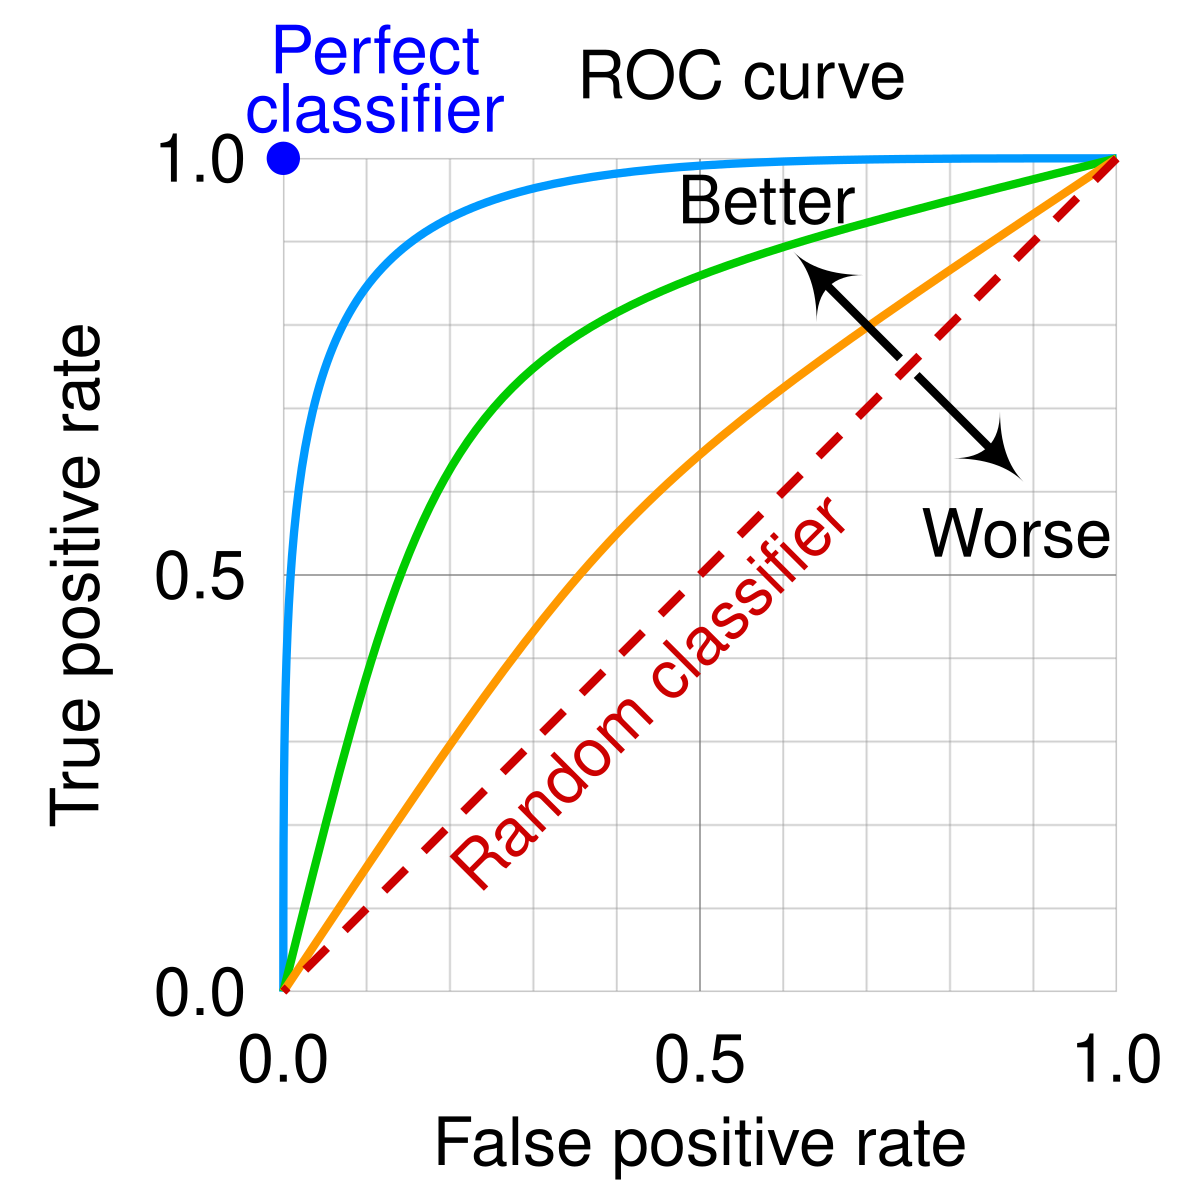

In [34]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_predict)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_predict)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_predict)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_predict)


In [35]:
import plotly.graph_objects as go
trace0 = go.Scatter(
    x=log_fpr,
    y=log_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {roc_auc_score(y_train , log_reg_predict)})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svc_fpr,
    y=svc_tpr,
    mode='lines',
    name=f'SVM (Area = {roc_auc_score(y_train , svc_predict)})'
)

trace2 = go.Scatter(
    x=knear_fpr,
    y=knear_tpr,
    mode='lines',
    name=f'SVM (Area = {roc_auc_score(y_train , knears_predict)})'
)
trace3 = go.Scatter(
    x=tree_fpr,
    y=tree_tpr,
    mode='lines',
    name=f'SVM (Area = {roc_auc_score(y_train , tree_predict)})'
)
# Diagonal line
trace4 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2 , trace3 , trace4]

# Define layout with square aspect ratio
layout = go.Layout(
    title='ROC Curve  Top 4 Classifiers',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=1300,
    height=800,
    showlegend=True
)


fig = go.Figure(data=data, layout=layout)

fig.show()


**Since we know Logistic Regression Model quiet working well.Now we will focus  on Logistic Rrgression Model**

**Before deep into drive let's understand certain metrics terms**

- True Positives: Correctly Classified Fraud Transactions
- False Positives: Incorrectly Classified Fraud Transactions
- True Negative: Correctly Classified Non-Fraud Transactions
- False Negative: Incorrectly Classified Non-Fraud Transactions
- Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It answers the question: "Out of all the items the model identified as relevant, how many were actually relevant?

    - True Positives / (True Positives + False Positives)

- Recall : Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It answers the question: "Out of all the actual relevant items, how many did the model correctly identify

    - True Positives / (True Positives + False Negatives)



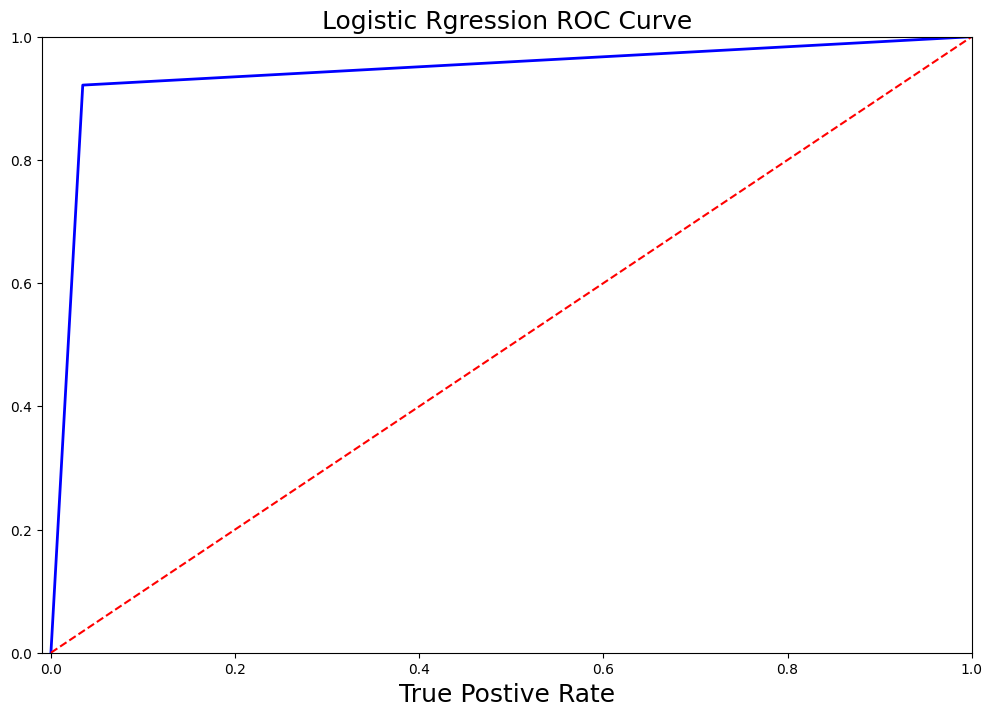

In [36]:
def logistic_roc_curve(log_fpr , log_tpr):
  plt.figure(figsize = (12 , 8))
  plt.title("Logistic Rgression ROC Curve" , fontsize = 18)
  plt.plot(log_fpr , log_tpr , "b-" , linewidth = 2)
  plt.plot([0,1] , [0,1] , "r--")
  plt.xlabel("False Postive Rate" , fontsize = 18)
  plt.xlabel("True Postive Rate" , fontsize = 18)
  plt.axis([-0.01 , 1 , 0 , 1])
  plt.show()

logistic_roc_curve(log_fpr , log_tpr)

In [37]:
from sklearn.metrics import precision_recall_curve
precision , recall , threshoold = precision_recall_curve(y_train , log_reg_predict)

In [38]:
y_pred = log_reg.predict(x_train)
print("Recall Score : {:.2f}".format(recall_score(y_pred , y_train)))
print("Precision Score : {:.2f}".format(precision_score(y_pred , y_train)))
print("F1 Score Score : {:.2f}".format(f1_score(y_pred , y_train)))
print("Accuracy Score Score : {:.2f}".format(accuracy_score(y_pred , y_train)))

Recall Score : 0.98
Precision Score : 0.93
F1 Score Score : 0.95
Accuracy Score Score : 0.96


# **Test Data with Logistic Regression**

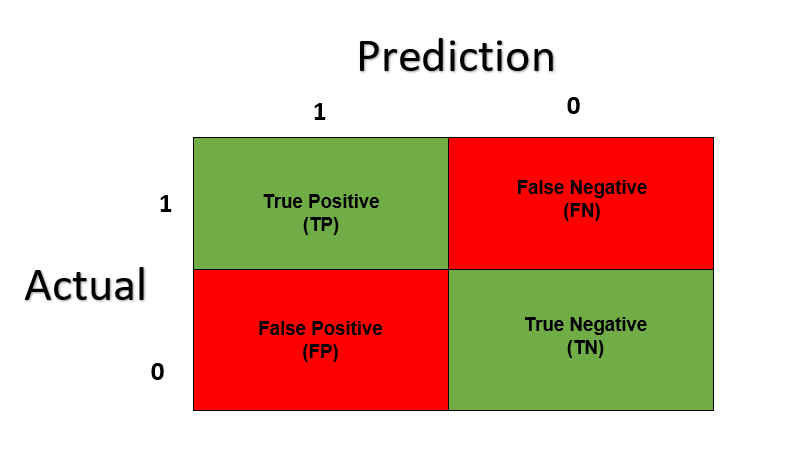

**Confusion Matrix:**
- Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


- True Negatives : This is the number of correctly classifications of the "No" (No Fraud Detected) class.

  - Examples - As per data it is Not a fraud and model predict it is not a fraud
    


- False Negatives (Type 2 Error) : This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.

  - Example - AS per  data it is fraud But my model predict it is not fraud


- False Positives (Type 1 Error) : This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class

  - Example - AS per data it is Not a fraud But my model predict it is  fraud
  


- True Positives : This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

  - Example - AS per data it is  a fraud and my model predict it is fraud

In [39]:
labels = ["No Fraud" , "Fraud"]
y_pred = log_reg.predict(x_train)
print(classification_report(y_pred , y_train , target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.99      0.93      0.96       427
       Fraud       0.93      0.98      0.95       360

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



Text(0.5, 1.0, 'Confusion matrix - Logistic Rgression')

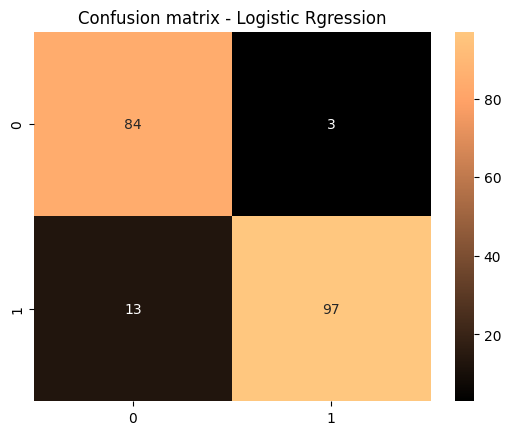

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(x_test)

log_reg_cf = confusion_matrix(y_test , y_pred)

# Logistic refression confusion matrix
sns.heatmap(log_reg_cf  , annot=True , cmap=plt.cm.copper)
plt.title("Confusion matrix - Logistic Rgression" , fontsize = 12)

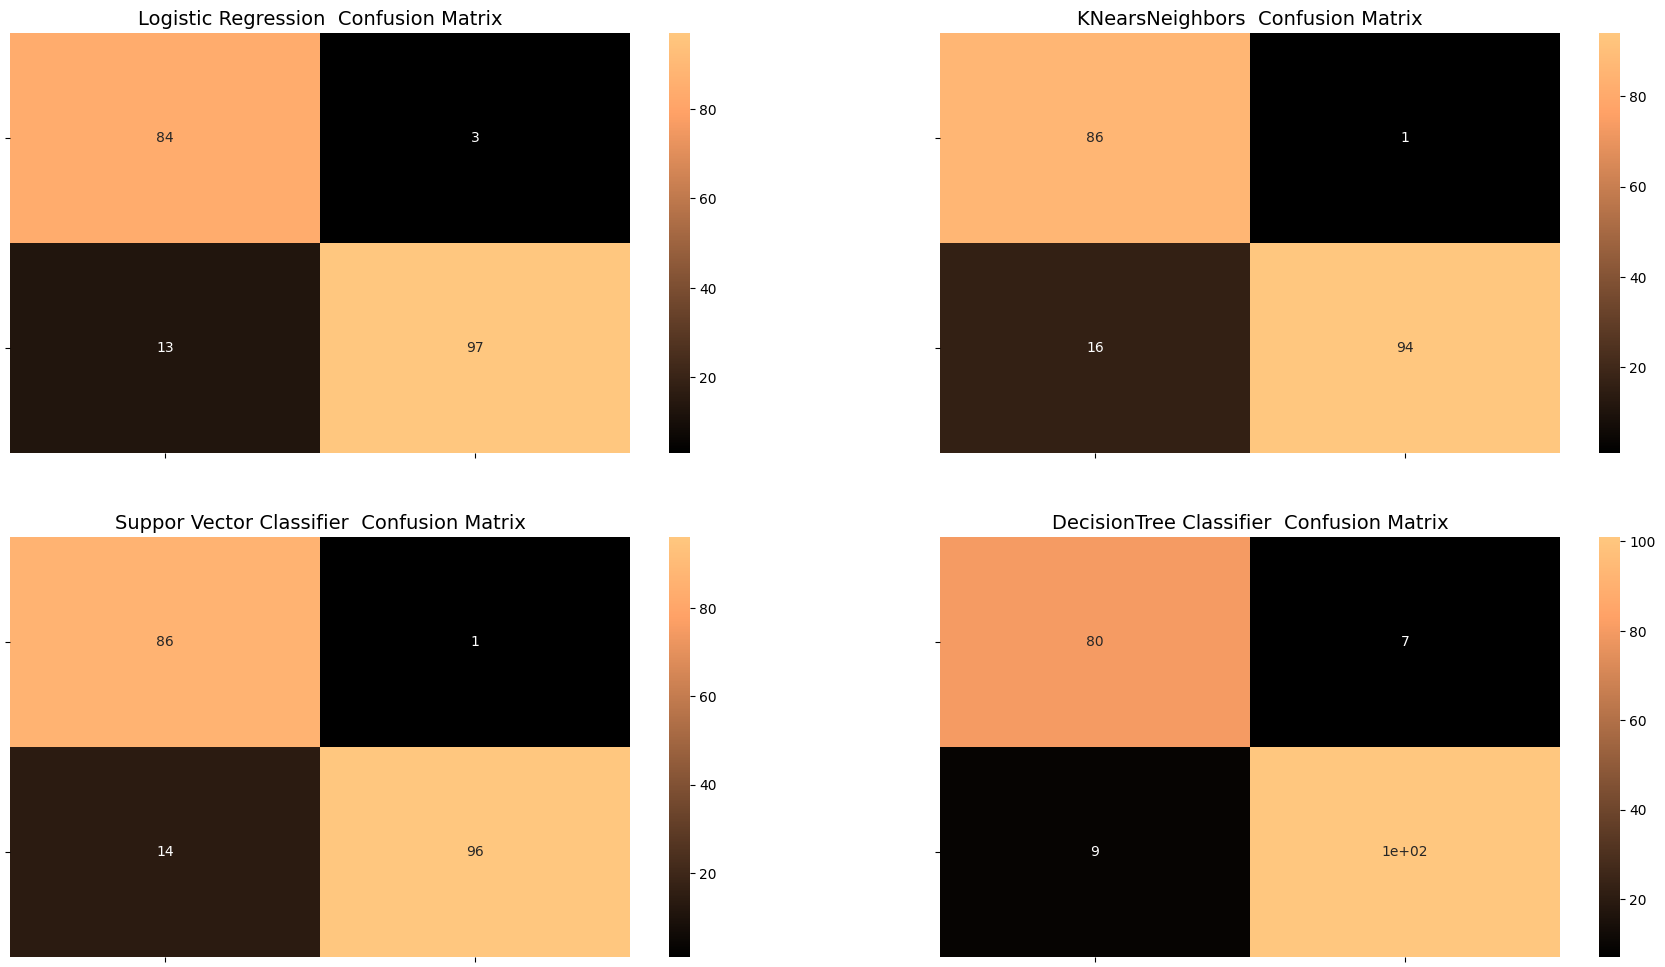

In [41]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbor.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression  Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors  Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier  Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier  Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [42]:
print("Logistic Regression :")
print(classification_report(y_test , y_pred_log_reg))
print("Knears Neigbours :")
print(classification_report(y_test , y_pred_knear))
print("SVM :")
print(classification_report(y_test , y_pred_svc))
print("Decision Tree Classifer :")
print(classification_report(y_test , y_pred_tree))

Logistic Regression :
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        87
           1       0.97      0.88      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

Knears Neigbours :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        87
           1       0.99      0.85      0.92       110

    accuracy                           0.91       197
   macro avg       0.92      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197

SVM :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        87
           1       0.99      0.87      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93    

**RandomForestClassifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300 ,
    criterion="gini" ,
    verbose = False
)

In [44]:
clf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=300, verbose=False)

Random Forest :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        87
           1       0.99      0.87      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



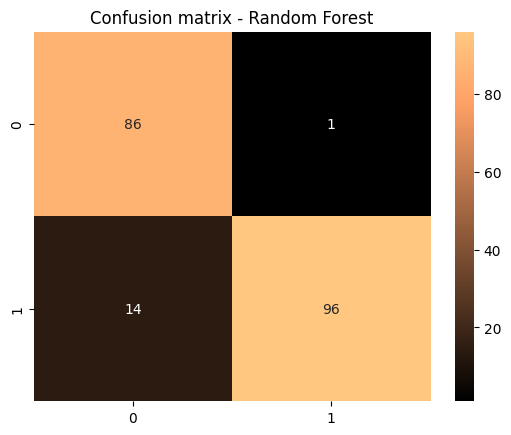

In [45]:
preds = clf.predict(x_test)

rf_cf = confusion_matrix(y_test , preds)

sns.heatmap(rf_cf  , annot=True , cmap=plt.cm.copper)
plt.title("Confusion matrix - Random Forest" , fontsize = 12)
print("Random Forest :")
print(classification_report(y_test , preds))

In [46]:
print("Random Forest :" , roc_auc_score(y_test , preds))

Random Forest : 0.9306165099268546


In [47]:
random_forest_params = {
    "criterion" :["gini" , "entropy"],
    'n_estimators': [50 , 100 , 200 , 400 , 500]
}
grid_random = GridSearchCV(RandomForestClassifier() , param_grid= random_forest_params)
grid_random.fit(x_train , y_train)

grid_par = grid_random.best_estimator_

rf_score = cross_val_score(grid_par , x_train , y_train , cv = 5)
print(' Random Forest Cross Validation Score: ', round(rf_score.mean() * 100, 2).astype(str) + '%')


 Random Forest Cross Validation Score:  93.9%


In [48]:
grid_par

RandomForestClassifier(criterion='entropy', n_estimators=500)